In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Arquivo criado para **teste** de códigos para realização de jogadas, caso tenha um bom resultado, será implementado nos algoritmos de IA para realizar os testes das jogadas

##### **Funções para classificação de jogadas**

In [2]:
# Função para verificar se as linhas são iguais
def verif_linhas(array):
    for linha in array:
        # Verificando se os elementos da linha são iguais exceto zero
        if (np.all(linha == 1) or np.all(linha == -1)) and np.any(linha != 0): 
           return str(linha[0]) # Retornando o valor do ganhador: 1 ou -1
       
    return False

# Função para verificar se as colunas são iguais          
def verif_colunas(array):
    # Transpondo o array para verificar colunas como se fossem linhas
    for coluna in array.T:  
        # Verificando se os elementos da coluna são iguais exceto zero
        if (np.all(coluna == 1) or np.all(coluna == -1)) and np.any(coluna != 0): 
            return str(coluna[0]) # Retornando o valor do ganhador: 1 ou -1
        
    return False

# Função para verificar se a diagonal principal são iguais
def verif_diag_principal(array):
    diagonal_principal = np.diag(array)  # Diagonal principal
    # Verificando se os elementos da diagonal principal são iguais exceto zero
    if (np.all(diagonal_principal == 1) or np.all(diagonal_principal == -1))  and np.all(diagonal_principal!=0) :
        return str(diagonal_principal[0]) # Retornando o valor do ganhador: 1 ou -1
    
    return False

# Função para verificar se a diagonal secundária são iguais
def verif_diag_secundaria(array):
    diagonal_secundaria = np.diag(np.fliplr(array))  # Diagonal secundária (flipping array)
    # Verificando se os elementos da diagonal secundária são iguais exceto zero
    if (np.all(diagonal_secundaria == 1) or np.all(diagonal_secundaria==-1))  and np.all(diagonal_secundaria!=0): 
        return str(diagonal_secundaria[0]) # Retornando o valor do ganhador: 1 ou -1
    
    return False

def get_vencedor(lista_respostas):
    for valor in lista_respostas:
        # Transormando cada valor em uma string, verifica-se se o valor é numérico (1 ou -1)
        valor = str(valor)
        # if valor.isnumeric():
        #     # Condicional para determinar qual valor retorna
        if valor == "1":
            return "X"
        elif valor == "-1":
            return "O"

def status_jogo(jogada):
    # Conversão do array que está sendo usado como parâmetro em uma matriz de 3x3
    jogada = np.array(jogada).reshape(3,3)
    
    # Criando uma lista com os retornos das funções verificadoras de cada jogada, o resultado é um array de 4 elementos. Ex: [1,False,False,False]
    lista_resposta = list([verif_colunas(jogada), verif_linhas(jogada), verif_diag_principal(jogada), verif_diag_secundaria(jogada)])
    # Se algum dos elementos da lista for diferente de false, a função get_vencedor será chamada
    if any(lista_resposta):
        valor = get_vencedor(lista_resposta)
        return valor + " VENCEU!"
    # Condicional para verificar se os únicos valores preenchidos no tabuleiro são 1 e -1
    elif len(np.unique(jogada)) == 2 and 0 not in np.unique(jogada):
        return "EMPATE"
    else:
        return "AINDA TEM JOGO"

##### **Funções para realização de jogadas**

In [5]:
# Função para coleta da jogada
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada,linha,coluna):
    
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    print("Linha:",linha)
    print("Linha:",coluna)
        
    # Verificar se o valor na posição especificada é igual a zero
    if jogada[linha-1][coluna-1] == 0:
        return True
    
    return False
    

# Função para realização da jogada do computador a partir de uma função aleatória
def jogada_COM(jogada):
    jogada_feita = False
    
    while not jogada_feita: 
        # Escolha de um índices de linha e coluna na lista
        linha = random.randint(0,2)
        coluna = random.randint(0,2)

        # Caso a posição escolhida esteja livre realiza a modificação
        if jogada[linha][coluna] not in [1,-1]:
            # Atrubuição realizada na posição aleatória escolhida
            jogada[linha,coluna] = -1
            jogada_feita = True
        
    return jogada


def ajuste_jogada(jogada,linha,coluna):
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    # Substituindo o valor da posição informada em 1
    jogada[linha-1,coluna-1] = 1

    return jogada

### **Função para plotagem do tabuleiro**

In [ ]:
import matplotlib.pyplot as plt

def plot_board(board,predicao=None):
    if predicao == 1:
        predicao = 'X ganhou'
    elif predicao == -1:
        predicao = 'O ganhou'
    elif predicao == 0:
        predicao = 'Empate'
    else:
        predicao = 'Ainda tem jogo'

    board = np.array(board).reshape(3, 3)

    
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    if predicao is not None:
        plt.text(1.5, -0.5, 'Status: ' + predicao, fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


#### **Realização da partida**

Linha: 1
Linha: 2
Jogada realizada!


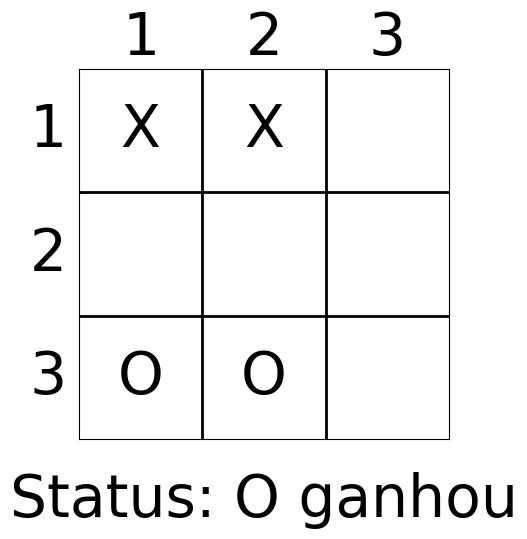

In [ ]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
plot_board(jogada)

finalizar_jogo = False

while not finalizar_jogo:
    clear_output(wait=True)
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        print('Jogada realizada!')
    else:
        print("Jogada não realizada")
        continue # Recomeça solicitando a jogada para o usuário
    
    # Redefinindo o shape do array 2d para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada do usuário
    status  = status_jogo(jogada)
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True
        plot_board(jogada,status)
        break
    
    jogada = jogada.reshape(3,3)

    # Realização de jogada da máquina
    jogada = jogada_COM(jogada)

    # Redefinindo o shape do array para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada da máquina
    status  = status_jogo(jogada)

    # Plotando o tabuleiro 
    plot_board(jogada,status)
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True

In [3]:
status_jogo()

TypeError: status_jogo() missing 1 required positional argument: 'jogada'

In [ ]:
# Função MiniMax
def minimax(board, depth, is_maximizing):
    winner = check_winner(board)
    if winner == AI:
        return 10 - depth
    elif winner == PLAYER:
        return depth - 10
    elif is_draw(board):
        return 0

    if is_maximizing:
        best_score = -math.inf
        for i in range(3):
            for j in range(3):
                if board[i, j] == ' ':
                    board[i, j] = AI
                    score = minimax(board, depth + 1, False)
                    board[i, j] = ' '
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = math.inf
        for i in range(3):
            for j in range(3):
                if board[i, j] == ' ':
                    board[i, j] = PLAYER
                    score = minimax(board, depth + 1, True)
                    board[i, j] = ' '
                    best_score = min(score, best_score)
        return best_score

# Função para encontrar a melhor jogada
def find_best_move(board):
    best_score = -math.inf
    best_move = None
    for i in range(3):
        for j in range(3):
            if board[i, j] == ' ':
                board[i, j] = AI
                score = minimax(board, 0, False)
                board[i, j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move